In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#names = pd.read_csv("spotify-names.txt", sep='\s+')#delim_whitespace=True)
song = pd.read_csv("spotify-extr.txt", delim_whitespace=True)

song.head()


,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
161704,0.647,1975,0.4490,0.376,298840,0.827,0.007880,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,0.000011,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,0.083900,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,0.552000,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,0.000008,G,0.348,-11.963,0,38,0.0639,97.831,C


In [33]:
print(song['key'].unique())

['B' 'Ab' 'G' 'D' 'E' 'F' 'Bb' 'Eb' 'A' 'Db' 'C' 'Gb']


In [34]:
songs = pd.DataFrame(song)
print(songs.describe())

            valence          year  acousticness  danceability      duration  \
count  10000.000000  10000.000000  10000.000000  10000.000000  1.000000e+04   
mean       0.532815   1977.026200      0.495719      0.540029  2.272151e+05   
std        0.262431     26.000068      0.377681      0.176193  1.124568e+05   
min        0.000000   1921.000000      0.000000      0.000000  5.991000e+03   
25%        0.324000   1956.000000      0.092675      0.417000  1.690670e+05   
50%        0.543000   1978.000000      0.504000      0.550000  2.065295e+05   
75%        0.751000   1999.000000      0.889250      0.671000  2.597330e+05   
max        0.993000   2020.000000      0.996000      0.988000  2.703227e+06   

             energy  instrumentalness      liveness      loudness  \
count  10000.000000      10000.000000  10000.000000  10000.000000   
mean       0.487500          0.164947      0.204063    -11.437683   
std        0.267729          0.313327      0.173221      5.787993   
min        0

In [35]:
songs.dtypes

valence             float64
year                  int64
acousticness        float64
danceability        float64
duration              int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                  int64
popularity            int64
speechiness         float64
tempo               float64
pop.class            object
dtype: object

In [36]:
songs['duration'] = songs['duration'].astype(float)
songs['mode'] = songs['mode'].astype(object)
songs.dtypes

valence             float64
year                  int64
acousticness        float64
danceability        float64
duration            float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
popularity            int64
speechiness         float64
tempo               float64
pop.class            object
dtype: object

# Exploratory statistics

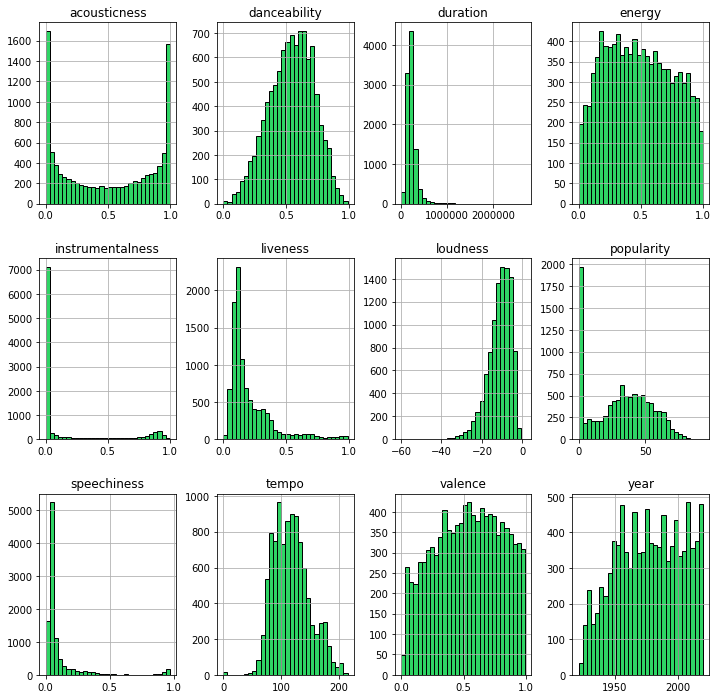

In [37]:
songs_hist = songs[["acousticness","danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "popularity", "speechiness", "tempo", "valence", "year"]]

fig, axes = plt.subplots(len(songs_hist.columns)//4, 4, figsize=(12, 12))

i = 0
for triaxis in axes:
    for axis in triaxis:
        songs_hist.hist(column = songs_hist.columns[i], bins = 30, ax=axis, color='#2FD565', edgecolor='black')
        i+=1

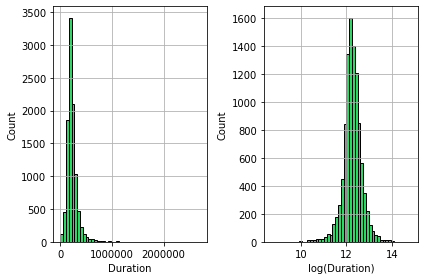

In [38]:
plt.subplot(1,2,1)
plt.hist(songs["duration"], bins=50, color='#2FD565', edgecolor='black')
plt.xlabel("Duration")
plt.ylabel("Count")
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(np.log(songs["duration"]), bins=50, color='#2FD565', edgecolor='black')
plt.xlabel("log(Duration)")
plt.ylabel("Count")
plt.grid(True)

plt.tight_layout()

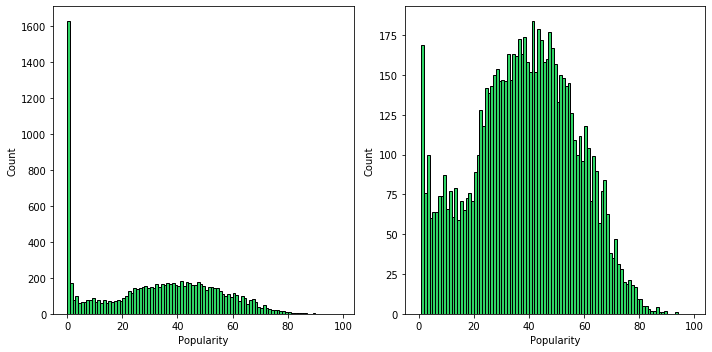

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(songs["popularity"], bins=np.arange(100), color='#2FD565', edgecolor='black')
plt.xlabel("Popularity")
plt.ylabel("Count")

plt.subplot(1,2,2)
pop = np.array(songs["popularity"])
indices = np.where(pop>=1)
plt.hist(pop[indices], bins=np.arange(100), color='#2FD565', edgecolor='black')
plt.xlabel("Popularity")
plt.ylabel("Count")

plt.tight_layout()

Text(0, 0.5, 'Year')

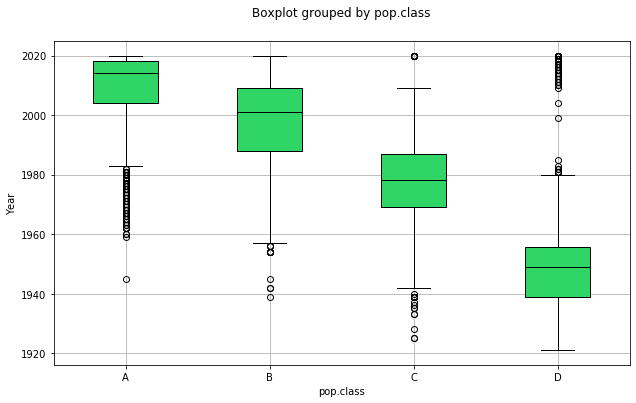

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
songs.boxplot(by='pop.class', column=['year'], ax=ax, 
              patch_artist=True, 
              boxprops={'facecolor':'#2FD565'}, 
              medianprops={'color':'#000000'}, 
              whiskerprops={'color':'#000000'})
ax.set_title('')
ax.set_ylabel('Year')

Text(0, 0.5, 'Acousticness')

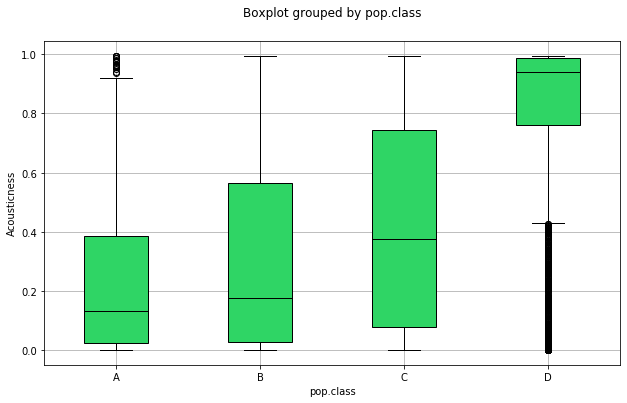

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
songs.boxplot(by='pop.class', column=['acousticness'], ax=ax, 
              patch_artist=True, 
              boxprops={'facecolor':'#2FD565'}, 
              medianprops={'color':'#000000'}, 
              whiskerprops={'color':'#000000'})
ax.set_title('')
ax.set_ylabel('Acousticness')

Text(0, 0.5, 'Energy')

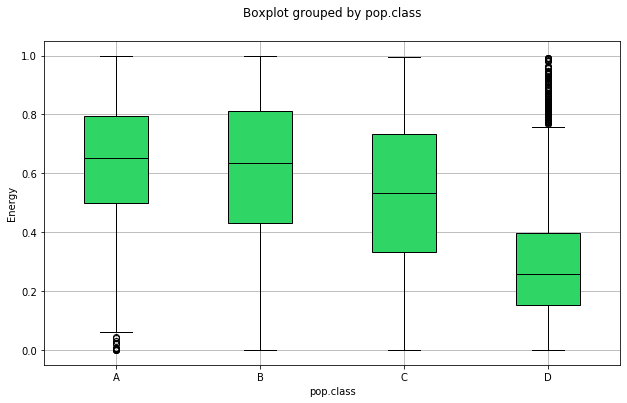

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
songs.boxplot(by='pop.class', column=['energy'], ax=ax, 
              patch_artist=True, 
              boxprops={'facecolor':'#2FD565'}, 
              medianprops={'color':'#000000'}, 
              whiskerprops={'color':'#000000'})
ax.set_title('')
ax.set_ylabel('Energy')

# Classificiation Models

## Logistic Regression

In [42]:
#song = pd.read_csv("spotify-extr.txt", delim_whitespace=True)
#songs = pd.DataFrame(song)
song_data = pd.get_dummies(songs, columns=["key"])

pred_vars = ["valence", "year", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"]
features = song_data[pred_vars]
pop_class = song_data[["pop.class"]]
train_features, test_features, train_labels, test_labels = train_test_split(features, pop_class, test_size=0.2)

print("train_features: ",train_features.shape)
print("test_features: ",test_features.shape)
print("train_labels: ",train_labels.shape)
print("test_labels: ",test_labels.shape)

#Scaling
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

model = LogisticRegression(penalty='none')
model.fit(train_features, train_labels) #Train
training_score = model.score(train_features, train_labels)
test_score = model.score(test_features, test_labels)

print("Training score: ", training_score)
print("Test score: ", test_score)
print("Feature coefficients: ",model.coef_)

train_features:  (8000, 24)
test_features:  (2000, 24)
train_labels:  (8000, 1)
test_labels:  (2000, 1)
Training score:  0.71675
Test score:  0.7275
Feature coefficients:  [[-1.38626389e-01  2.92509181e+00 -1.46930215e-01  1.41257279e-01
  -2.65343398e-01 -6.26387464e-02 -2.97033918e-01 -9.65005853e-02
   1.22487672e-01 -1.61564536e-02 -2.47512954e-01 -9.20520387e-03
   2.16581040e-02  2.67502659e-02 -3.69478195e-02  6.80768104e-02
  -1.60359473e-02 -3.88473665e-02 -5.48994002e-03 -2.61100516e-02
  -6.71506322e-03  1.80931510e-02 -4.11510530e-02  5.93325967e-02]
 [ 1.09436014e-01  1.45111849e+00 -1.37576581e-02 -8.46840012e-02
   1.17048933e-01 -1.06366317e-01 -4.39753091e-02  9.40268874e-03
   1.66335984e-01 -2.74230974e-02 -2.37838128e-01  1.65791589e-02
   2.75479534e-02  1.10744485e-02  2.36091378e-02  2.76380295e-02
  -2.67393872e-02  9.90281113e-03 -3.13378911e-02 -2.33204162e-02
   2.78778443e-02 -1.06278085e-02 -1.22027588e-02 -1.01963745e-02]
 [ 4.69753257e-02 -5.67362148e-01 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


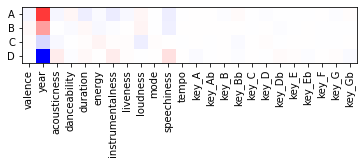

In [43]:
vlim = np.max(np.abs(model.coef_))
plt.imshow(model.coef_, cmap='bwr', vmin=-vlim, vmax=vlim)
plt.xticks(list(range(len(pred_vars))), labels=pred_vars, rotation=90)
plt.yticks([0,1,2,3], labels=model.classes_)
plt.show()

**Without year?**

In [44]:
# Remove year from features: 
pred_vars = ["valence", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"]
features = song_data[pred_vars]
pop_class = song_data[["pop.class"]]
train_features, test_features, train_labels, test_labels = train_test_split(features, pop_class, test_size=0.2)


scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.fit_transform(test_features)

model = LogisticRegression(penalty='none')
model.fit(train_features, train_labels) #Train
training_score = model.score(train_features, train_labels)
test_score = model.score(test_features, test_labels)

print('Training score: ', training_score)
print('Test score: ', test_score)

Training score:  0.579625
Test score:  0.5785


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


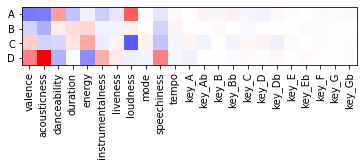

In [45]:
vlim = np.max(np.abs(model.coef_))
plt.imshow(model.coef_, cmap='bwr', vmin=-vlim, vmax=vlim)
plt.xticks(list(range(len(pred_vars))), labels=pred_vars, rotation=90)
plt.yticks([0,1,2,3], labels=model.classes_)
plt.show()

## Decision Trees

In [46]:
songs.head()

,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
161704,0.647,1975,0.4490,0.376,298840.0,0.827,0.007880,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800.0,0.169,0.000011,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093.0,0.878,0.083900,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200.0,0.980,0.552000,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800.0,0.625,0.000008,G,0.348,-11.963,0,38,0.0639,97.831,C


In [47]:
pred_vars = ["valence", "year", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"]
features = song_data[pred_vars]
pop_class = song_data[["pop.class"]]
train_features, test_features, train_labels, test_labels = train_test_split(features, pop_class, test_size=0.2)

classifier = DecisionTreeClassifier()
classifier.fit(train_features, train_labels)
print(classifier.score(test_features, test_labels))

0.616


**Pruning..?**

In [48]:
print(classifier.tree_.max_depth)

34


In [58]:
classifier = DecisionTreeClassifier(random_state=0, max_depth=5)
classifier.fit(train_features, train_labels)
print(classifier.score(test_features, test_labels))

0.725


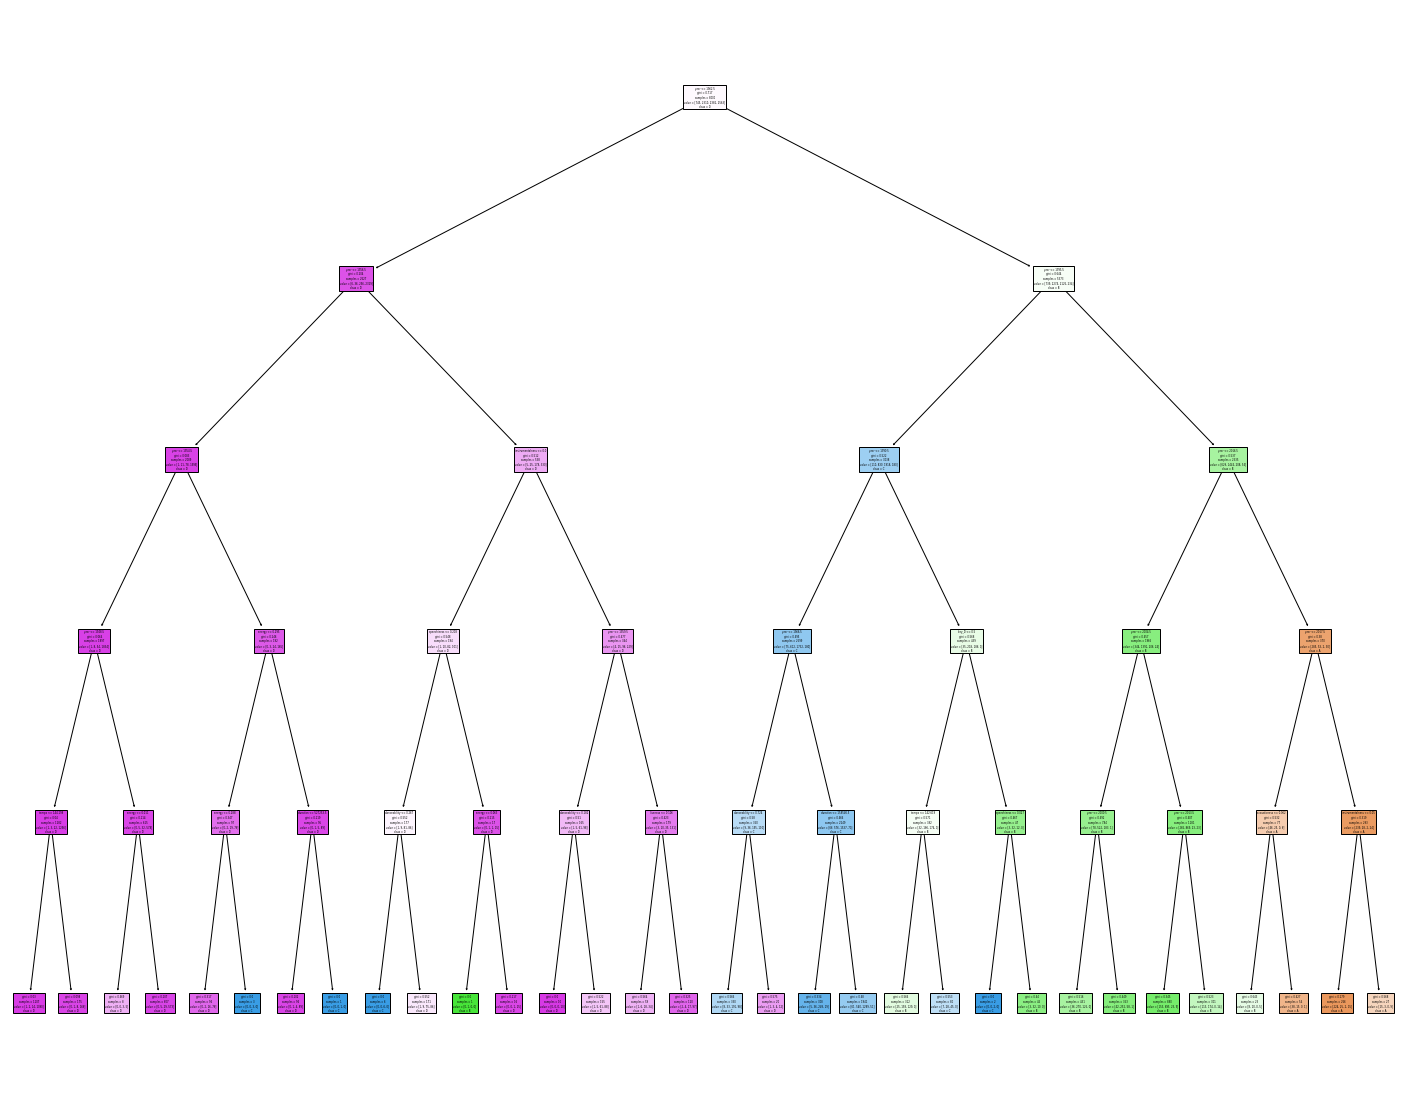

In [59]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=["valence", "year", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"],  
                   class_names=["A", "B", "C", "D"],
                   filled=True)

**Without year?**

In [52]:
pred_vars = ["valence", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"]
features = song_data[pred_vars]
pop_class = song_data[["pop.class"]]

train_features, test_features, train_labels, test_labels = train_test_split(features, pop_class, test_size=0.2)
classifier = DecisionTreeClassifier(random_state=0, max_depth=5)
classifier.fit(train_features, train_labels)
print(classifier.score(test_features, test_labels))

0.5625


## Random Forest

In [64]:
pred_vars = ["valence", "year", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"]
features = song_data[pred_vars]
pop_class = song_data[["pop.class"]]
train_features, test_features, train_labels, test_labels = train_test_split(features, pop_class, test_size=0.2)

classifier = RandomForestClassifier(n_estimators = 7000, random_state=0)
classifier.fit(train_features, train_labels)
print(classifier.score(test_features, test_labels))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.7345


**Visual representation**

In [75]:
start_time = time.time()
importances = classifier.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in classifier.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 1.255 seconds


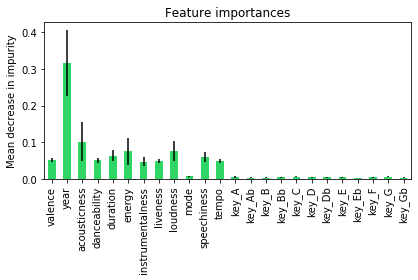

In [80]:
importances = classifier.feature_importances_

forest_importances = pd.Series(importances, index=pred_vars)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, color='#2FD565')
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

**Without year?**

In [83]:
pred_vars = ["valence", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"]
features = song_data[pred_vars]
pop_class = song_data[["pop.class"]]
train_features, test_features, train_labels, test_labels = train_test_split(features, pop_class, test_size=0.2)

classifier = RandomForestClassifier(n_estimators = 7000, random_state=0)
classifier.fit(train_features, train_labels)
print(classifier.score(test_features, test_labels))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.611


## K nearest neighbors

In [85]:
pred_vars = ["valence", "year", "acousticness", "danceability", "duration", "energy", "instrumentalness", "liveness", "loudness", "mode", "speechiness", "tempo", "key_A", "key_Ab", "key_B", "key_Bb", "key_C", "key_D", "key_Db", "key_E", "key_Eb", "key_F", "key_G", "key_Gb"]
features = song_data[pred_vars]
pop_class = song_data[["pop.class"]]
train_features, test_features, train_labels, test_labels = train_test_split(features, pop_class, test_size=0.2)

model = KNeighborsClassifier(n_neighbors=70)
model.fit(train_features, train_labels)
training_score = model.score(train_features, train_labels)
test_score = model.score(test_features, test_labels)

print('Training score: ', training_score)
print('Test score: ', test_score)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training score:  0.445875
Test score:  0.421
